In [1]:
import pandas as pd
import numpy as np

# 1. Data Loading

In [2]:
data=pd.read_csv("/kaggle/input/top-it-companies-worldwide-dataset/company_data.csv")

# 2. Basic Data Inspection

In [3]:
data.head()#Display Top Rows:

,Company Name,Company Link,Locations,Service Speciality List,Team Size,Founding Year,Hourly Rate
0,Incrementors Web Solutions,https://techbehemoths.com/company/incrementors...,"Sacramento, United States",SEO\nWeb Design,50-249,2012,$30-70/h
1,Labnify,https://techbehemoths.com/company/Labnify,"Albuquerque, United States",Email Marketing\nConversion Optimization,10-49,2020,$150-250/h
2,MONGID | Software House,https://techbehemoths.com/company/mongid,"Ramallah, Palestinian Territory",Custom Software Development\nWeb Development\n...,2-9,2017,$30-70/h
3,Andersen,https://techbehemoths.com/company/andersen,"Warsaw, Poland",Mobile App Development\nWeb Development\nUX/UI...,"1,000-9,999",2007,$70-150/h
4,Newwave Solutions,https://techbehemoths.com/company/newwave-solu...,"Hanoi, Vietnam",Web Development\nMobile App Development\nWeb D...,50-249,2011,$30-70/h


In [4]:
data.tail() # Display Bottom Rows

,Company Name,Company Link,Locations,Service Speciality List,Team Size,Founding Year,Hourly Rate
83,Afocus Development,https://techbehemoths.com/company/vnited-co,"Ho Chi Minh City, Vietnam",IT Staff Augmentation\nWeb Development\nE-Comm...,10-49,2018,$30-70/h
84,Tailored Website Design,https://techbehemoths.com/company/tailored-web...,"San Francisco, United States",Web Development\nBranding\nOther Marketing\nSM...,50-249,2012,$150-250/h
85,HyperSense Software,https://techbehemoths.com/company/hypersense-s...,"Schaumburg, United States",Custom Software Development\nWeb Development\n...,50-249,2003,$70-150/h
86,Wolfpack Digital,https://techbehemoths.com/company/wolfpack-dig...,"Cluj-Napoca, Romania",Mobile App Development\nWeb Development\nUX/UI...,50-249,2015,$70-150/h
87,Hidden Brains InfoTech,https://techbehemoths.com/company/hidden-brain...,"Ahmedabad, India",Web Development\nMobile App Development\nE-Com...,250-999,2003,$30-70/h


In [5]:
data.dtypes #Display Data Types

Company Name               object
Company Link               object
Locations                  object
Service Speciality List    object
Team Size                  object
Founding Year               int64
Hourly Rate                object
dtype: object

In [6]:
data.describe() # Summary Statistics

,Founding Year
count,88.000000
mean,2011.670455
std,7.559301
min,1987.000000
25%,2007.000000
50%,2013.500000
75%,2017.250000
max,2023.000000


In [7]:
data.info()# Display Index, Columns, and Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company Name             88 non-null     object
 1   Company Link             88 non-null     object
 2   Locations                88 non-null     object
 3   Service Speciality List  88 non-null     object
 4   Team Size                88 non-null     object
 5   Founding Year            88 non-null     int64 
 6   Hourly Rate              88 non-null     object
dtypes: int64(1), object(6)
memory usage: 4.9+ KB


#  3. Data Cleaning


* ● Check for Missing Values: df.isnull().sum()
* ● Fill Missing Values: df.fillna(value)
* ● Drop Missing Values: df.dropna()
* ● Rename Columns: df.rename(columns={'old_name': 'new_name'})
* ● Drop Columns: df.drop(columns=['column_name'])


In [8]:
data.isnull().sum() # Check for Missing Values

Company Name               0
Company Link               0
Locations                  0
Service Speciality List    0
Team Size                  0
Founding Year              0
Hourly Rate                0
dtype: int64

# 4. Data Transformation

* **Apply Function:** df['column'].apply(lambda x: function(x))

*  **Group By and Aggregate:** df.groupby('column').agg({'column': 'sum'})

* **Pivot Tables:** df.pivot_table(index='column1', values='column2', aggfunc='mean')

*  **Merge DataFrames:** pd.merge(df1, df2, on='column')

* **Concatenate DataFrames:** pd.concat([df1, df2])


In [9]:
data['Service Speciality List']

0                                       SEO\nWeb Design
1              Email Marketing\nConversion Optimization
2     Custom Software Development\nWeb Development\n...
3     Mobile App Development\nWeb Development\nUX/UI...
4     Web Development\nMobile App Development\nWeb D...
                            ...                        
83    IT Staff Augmentation\nWeb Development\nE-Comm...
84    Web Development\nBranding\nOther Marketing\nSM...
85    Custom Software Development\nWeb Development\n...
86    Mobile App Development\nWeb Development\nUX/UI...
87    Web Development\nMobile App Development\nE-Com...
Name: Service Speciality List, Length: 88, dtype: object

In [10]:
data['Service Speciality List'][1]

'Email Marketing\nConversion Optimization'

In [11]:
def convert_Service_Speciality_toList(string):
    return string.split("\n")
convert_Service_Speciality_toList(data['Service Speciality List'][1])

['Email Marketing', 'Conversion Optimization']

In [12]:
#Apply Function: we have data['Service Speciality List'] as string we convert to  list of service 
data['Service Speciality List']=data['Service Speciality List'].apply(lambda x: convert_Service_Speciality_toList(x))

In [13]:
data.groupby('Locations').agg({'Locations':'count'})

,Locations
Locations,
"Adelaide, Australia",1
"Ahmedabad, India",4
"Albany, United States",1
"Albuquerque, United States",1
"Arlington, United States",1
...,...
"West Linn, United States",1
"White Plains, United States",1
"Wilmington DE, United States",1


In [14]:
#String Split:
data[['state','country']]= data['Locations'].str.split(',', expand=True)

In [15]:
data=data.drop(columns=['Locations'])

In [16]:
data.columns

Index(['Company Name', 'Company Link', 'Service Speciality List', 'Team Size',
       'Founding Year', 'Hourly Rate', 'state', 'country'],
      dtype='object')

In [17]:
data[['country','state']]

,country,state
0,United States,Sacramento
1,United States,Albuquerque
2,Palestinian Territory,Ramallah
3,Poland,Warsaw
4,Vietnam,Hanoi
...,...,...
83,Vietnam,Ho Chi Minh City
84,United States,San Francisco
85,United States,Schaumburg
86,Romania,Cluj-Napoca


In [18]:
data.columns

Index(['Company Name', 'Company Link', 'Service Speciality List', 'Team Size',
       'Founding Year', 'Hourly Rate', 'state', 'country'],
      dtype='object')

# 5. Data Visualization Integration

In [19]:
import matplotlib.pyplot as plt

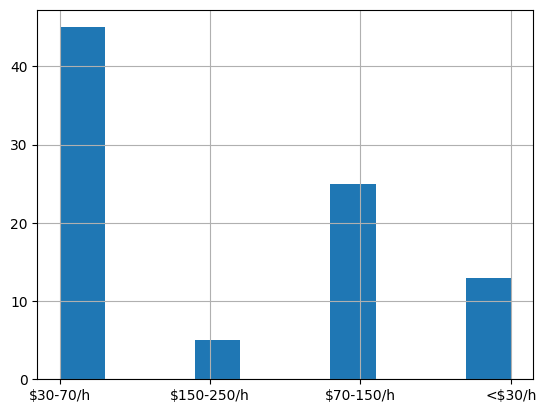

In [20]:
data['Hourly Rate'].hist()
plt.show()

<Axes: xlabel='Hourly Rate', ylabel='country'>

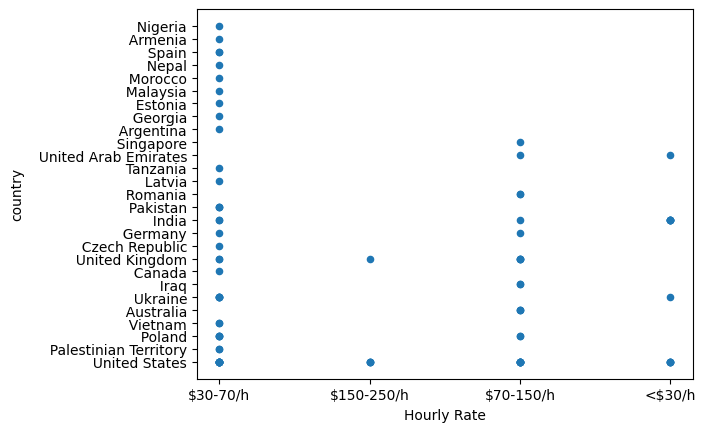

In [21]:
data.plot.scatter(x='Hourly Rate',y='country')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '  United States'),
  Text(1, 0, '  Palestinian Territory'),
  Text(2, 0, '  Poland'),
  Text(3, 0, '  Vietnam'),
  Text(4, 0, '  Australia'),
  Text(5, 0, '  Ukraine'),
  Text(6, 0, '  Iraq'),
  Text(7, 0, '  Canada'),
  Text(8, 0, '  United Kingdom'),
  Text(9, 0, '  Czech Republic'),
  Text(10, 0, '  Germany'),
  Text(11, 0, '  India'),
  Text(12, 0, '  Pakistan'),
  Text(13, 0, '  Romania'),
  Text(14, 0, '  Latvia'),
  Text(15, 0, '  Tanzania'),
  Text(16, 0, '  United Arab Emirates'),
  Text(17, 0, '  Singapore'),
  Text(18, 0, '  Argentina'),
  Text(19, 0, '  Georgia'),
  Text(20, 0, '  Estonia'),
  Text(21, 0, '  Malaysia'),
  Text(22, 0, '  Morocco'),
  Text(23, 0, '  Nepal'),
  Text(24, 0, '  Spain'),
  Text(25, 0, '  Armenia'),
  Text(26, 0, '  Nigeria')])

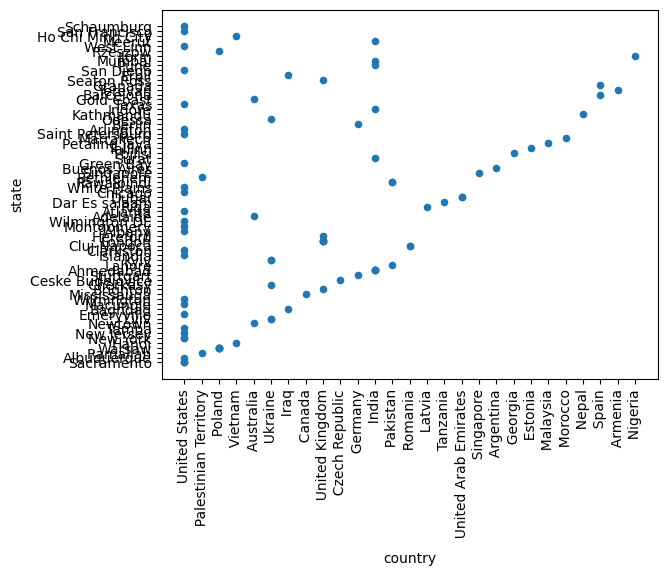

In [22]:

data.plot.scatter(x='country',y='state')
plt.xticks(rotation=90)

<Axes: xlabel='Hourly Rate'>

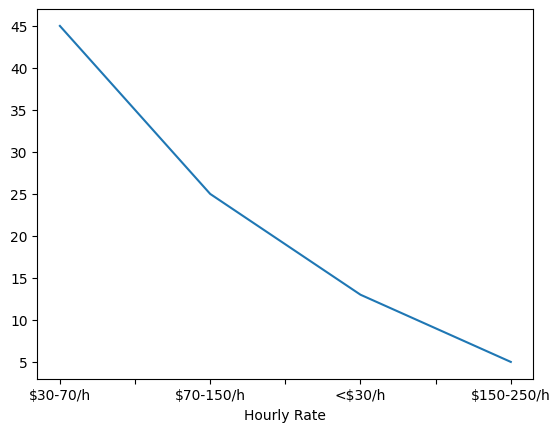

In [23]:
data['Hourly Rate'].value_counts().plot()

<Axes: >

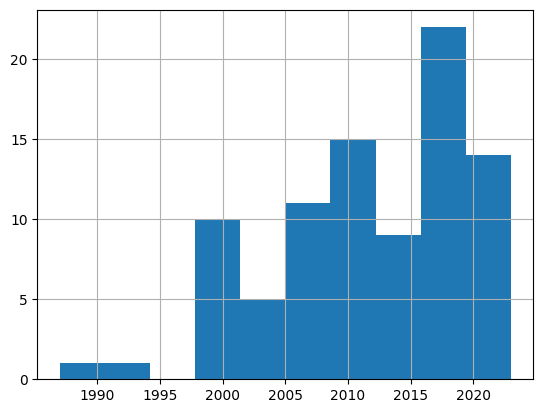

In [24]:
data['Founding Year'].hist()

<Axes: xlabel='Founding Year', ylabel='Hourly Rate'>

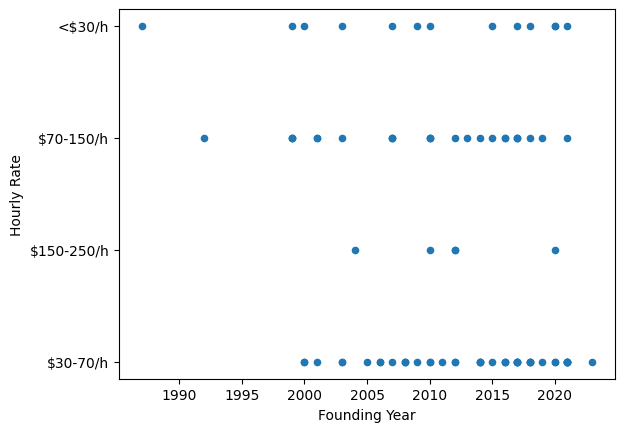

In [25]:
data.plot.scatter(x='Founding Year',y='Hourly Rate')

# 6. Statistical Analysis

In [26]:
data['Hourly Rate'].value_counts() # Value Counts

Hourly Rate
$30-70/h      45
$70-150/h     25
<$30/h        13
$150-250/h     5
Name: count, dtype: int64

In [27]:
np.unique(data['Hourly Rate']) # Unique Values in Column

array(['$150-250/h', '$30-70/h', '$70-150/h', '<$30/h'], dtype=object)

In [28]:
data['Hourly Rate'].nunique() # Number of Unique Values

4

#  Categorical Data Operations

In [29]:
data[data['Hourly Rate']=='$30-70/h'][data['Founding Year']<2009]

/tmp/ipykernel_18/3275332483.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Hourly Rate']=='$30-70/h'][data['Founding Year']<2009]


,Company Name,Company Link,Service Speciality List,Team Size,Founding Year,Hourly Rate,state,country
9,QArea,https://techbehemoths.com/company/qarea,"[Custom Software Development, Web Development,...",250-999,2001,$30-70/h,Lviv,Ukraine
10,Seasia Infotech,https://techbehemoths.com/company/seasia-infotech,"[Custom Software Development, Web Development,...",250-999,2000,$30-70/h,Emeryville,United States
18,Acropolium,https://techbehemoths.com/company/acropolium,"[Custom Software Development, Web Development,...",50-249,2003,$30-70/h,Ceske Budejovice,Czech Republic
19,*instinctools,https://techbehemoths.com/company/instinctools,"[Web Development, Web Design, IT Staff Augment...",250-999,2000,$30-70/h,Stuttgart,Germany
23,Roman.ua,https://techbehemoths.com/company/roman-ua,"[Email Marketing, Pay Per Click, Advertising, ...",10-49,2008,$30-70/h,Kyiv,Ukraine
25,XB Software,https://techbehemoths.com/company/xb-software,"[Custom Software Development, IT Staff Augment...",50-249,2008,$30-70/h,Warsaw,Poland
33,Startbit IT Solutions Pvt. Ltd.,https://techbehemoths.com/company/startbit-it-...,"[IT Staff Augmentation, Custom Software Develo...",50-249,2008,$30-70/h,Wilmington DE,United States
37,Snotor,https://techbehemoths.com/company/snotor,"[Mobile App Development, Web Development, Arti...",50-249,2007,$30-70/h,Riga,Latvia
71,Alto Servicios Comunicación,https://techbehemoths.com/company/alto-servici...,"[SEO, Digital Strategy, Web Design, Content Ma...",2-9,2006,$30-70/h,Granada,Spain
72,AFIVE Digital Agency,https://techbehemoths.com/company/afive-digita...,"[SEO, Web Development, E-Commerce Development,...",2-9,2005,$30-70/h,Seaton Ross,United Kingdom


In [30]:
data[data['Hourly Rate']=='$150-250/h']

,Company Name,Company Link,Service Speciality List,Team Size,Founding Year,Hourly Rate,state,country
1,Labnify,https://techbehemoths.com/company/Labnify,"[Email Marketing, Conversion Optimization]",10-49,2020,$150-250/h,Albuquerque,United States
26,Aqaba Digital,https://techbehemoths.com/company/aqaba-techno...,"[Digital Strategy, Pay Per Click, Web Developm...",10-49,2004,$150-250/h,Clarkston,United States
30,The DM Lab,https://techbehemoths.com/company/the-dm-lab,"[SEO, Pay Per Click, Web Development, Web Desi...",2-9,2010,$150-250/h,Hereford,United Kingdom
81,Intuitive Digital,https://techbehemoths.com/company/intuitive-di...,"[Digital Strategy, SEO, Web Development, Pay P...",10-49,2012,$150-250/h,West Linn,United States
84,Tailored Website Design,https://techbehemoths.com/company/tailored-web...,"[Web Development, Branding, Other Marketing, S...",50-249,2012,$150-250/h,San Francisco,United States


In [31]:
data[data['Hourly Rate']=='$150-250/h'][data['Team Size']=='10-49']

/tmp/ipykernel_18/2651833981.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['Hourly Rate']=='$150-250/h'][data['Team Size']=='10-49']


,Company Name,Company Link,Service Speciality List,Team Size,Founding Year,Hourly Rate,state,country
1,Labnify,https://techbehemoths.com/company/Labnify,"[Email Marketing, Conversion Optimization]",10-49,2020,$150-250/h,Albuquerque,United States
26,Aqaba Digital,https://techbehemoths.com/company/aqaba-techno...,"[Digital Strategy, Pay Per Click, Web Developm...",10-49,2004,$150-250/h,Clarkston,United States
81,Intuitive Digital,https://techbehemoths.com/company/intuitive-di...,"[Digital Strategy, SEO, Web Development, Pay P...",10-49,2012,$150-250/h,West Linn,United States


In [32]:
data['country'].unique()

array(['  United States', '  Palestinian Territory', '  Poland',
       '  Vietnam', '  Australia', '  Ukraine', '  Iraq', '  Canada',
       '  United Kingdom', '  Czech Republic', '  Germany', '  India',
       '  Pakistan', '  Romania', '  Latvia', '  Tanzania',
       '  United Arab Emirates', '  Singapore', '  Argentina',
       '  Georgia', '  Estonia', '  Malaysia', '  Morocco', '  Nepal',
       '  Spain', '  Armenia', '  Nigeria'], dtype=object)

In [33]:
data[data['country'].str.contains('United States')]

,Company Name,Company Link,Service Speciality List,Team Size,Founding Year,Hourly Rate,state,country
0,Incrementors Web Solutions,https://techbehemoths.com/company/incrementors...,"[SEO, Web Design]",50-249,2012,$30-70/h,Sacramento,United States
1,Labnify,https://techbehemoths.com/company/Labnify,"[Email Marketing, Conversion Optimization]",10-49,2020,$150-250/h,Albuquerque,United States
5,Crocoapps,https://techbehemoths.com/company/crocoapps,"[Web Development, Mobile App Development, SEO,...",50-249,2015,<$30/h,New York,United States
6,Glorium Technologies,https://techbehemoths.com/company/glorium-tech...,"[Custom Software Development, Web Development,...",50-249,2010,$30-70/h,New Jersey,United States
7,SolidBrain,https://techbehemoths.com/company/solidbrain,"[Web Development, Custom Software Development,...",50-249,2014,$30-70/h,Tampa,United States
10,Seasia Infotech,https://techbehemoths.com/company/seasia-infotech,"[Custom Software Development, Web Development,...",250-999,2000,$30-70/h,Emeryville,United States
12,Hydralab,https://techbehemoths.com/company/hydralab-llc,"[Blockchain, Cloud Consulting, Custom Software...",50-249,2016,$70-150/h,Macungie,United States
13,Rocket Systems,https://techbehemoths.com/company/rocket-systems,"[Artificial Intelligence, Custom Software Deve...",50-249,2018,<$30/h,Sacramento,United States
14,DigiTrends,https://techbehemoths.com/company/digitrends,"[Mobile App Development, Custom Software Devel...",10-49,2010,$30-70/h,Wilmington,United States
24,Codment,https://techbehemoths.com/company/codment,"[Mobile App Development, Web Design, Web Devel...",50-249,2019,$30-70/h,Islandia,United States


#  Profiling Data for Quick Insights


In [34]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")

In [35]:
# View the report in a Jupyter Notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
#save the report to an HTML file
profile.to_file("data_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]